In [1]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
bike = pd.read_csv('day.csv')
bike.info()

Data = bike[['cnt', 'temp']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [3]:
data= Data.sample(n=30).reset_index()
# 데이터 개수가 적을때 쓸데없이 복잡한 모델을 만들어보려고
# 얼마나 과적화 되어버리는지
data.shape[0]

30

In [4]:
# Train-Test Split

N=data.shape[0] #행 개수 / data.shape[1] -> 열 

test= np.random.choice(np.arange(N), 10, replace=False)
#np.arrange(N)=30 -> [0,30) 중 10개 선택 

train_df = data[~data.index.isin(test)].copy() #가져온 데이터만 수정, 원본 유지 
test_df = data[data.index.isin(test)].copy()

print(train_df.shape, test_df.shape)

(20, 3) (10, 3)


In [5]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

In [6]:
# Design Matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [7]:
degree=list(range(1,15))
pr=LinearRegression(fit_intercept=False)

train_log_mse=[]


for m in degree :
    poly = PolynomialFeatures(degree=m)
    
    X_train_poly = poly.fit_transform(X_train) 
    #fit(): 정규화를 위해 mu, sigma 계산 , transform(): 정규화
    
    pr.fit(X_train_poly, y_train)
    
    y_train_poly_pred=pr.predict(X_train_poly)
    
    mse=mean_squared_error(y_train,y_train_poly_pred)
    train_log_mse.append(np.log(mse))

print(train_log_mse)

[14.573840709937269, 14.254023070724235, 14.182817244979578, 14.001285208811648, 13.920109473260302, 13.702754104486141, 13.702008094545427, 13.67888338938445, 13.662500106217394, 13.13335969403172, 13.030567447911926, 12.188020688757948, 11.75072961578368, 10.391319243354397]


In [8]:
test_log_mse=[]

for m in degree :
    poly = PolynomialFeatures(degree=m) 
    
    X_test_poly = poly.fit_transform(X_test) 
    
    pr.fit(X_test_poly, y_test)
    
    y_test_poly_pred=pr.predict(X_test_poly)
    
    mse=mean_squared_error(y_test,y_test_poly_pred)
    test_log_mse.append(np.log(mse))

print(test_log_mse)

[14.545769737216993, 14.48064743466328, 14.479191339234674, 14.473309174643711, 14.411523865731425, 14.046660007785633, 13.04194462379279, 12.702177719470933, -18.917921738182816, -21.28693629208593, -24.49384841100333, -24.032603419184536, -26.30504047977126, -27.703006463638346]


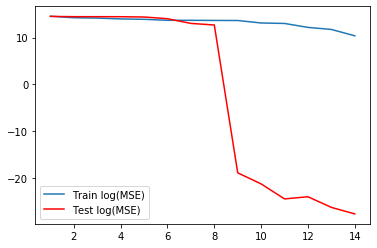

In [12]:
plt.plot(degree, train_log_mse, label="Train log(MSE)")
plt.plot(degree, test_log_mse, color="red",label="Test log(MSE)")
plt.legend()